In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the Data

In [2]:
#Read the data
google = pd.read_csv("C:/Users/KORKMAZ/Desktop/Team project/WEEK 7/googleplaystore.csv")

In [3]:
google_reviews = pd.read_csv("C:/Users/KORKMAZ/Desktop/Team project/WEEK 7/googleplaystore_user_reviews.csv")

In [4]:
#Check dimensions
google.shape

(10841, 13)

In [5]:
google_reviews.shape

(64295, 5)

In [6]:
#Gathering more information
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
google_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [9]:
#Exploring a few rows
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
google_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [11]:
google.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [12]:
google_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [13]:
categorical = google.dtypes[google.dtypes == 'object'].index

google[categorical].describe()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


## Data Cleaning

### Google DataFrame

In [14]:
#Checking Missing values
google.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [15]:
#It can clearly be seen that there are some duplicated values in
#the dataframe that needs to be removed!
google["App"].describe()

count      10841
unique      9660
top       ROBLOX
freq           9
Name: App, dtype: object

In [16]:
google.drop_duplicates("App",inplace = True)

In [17]:
google["App"].describe()

count                                               9660
unique                                              9660
top       Photo Editor & Candy Camera & Grid & ScrapBook
freq                                                   1
Name: App, dtype: object

In [18]:
google.groupby("App")["App"].count()

App
"i DT" Fútbol. Todos Somos Técnicos.                1
+Download 4 Instagram Twitter                       1
- Free Comics - Comic Apps                          1
.R                                                  1
/u/app                                              1
                                                   ..
뽕티비 - 개인방송, 인터넷방송, BJ방송                             1
💎 I'm rich                                          1
💘 WhatsLov: Smileys of love, stickers and GIF       1
📏 Smart Ruler ↔️ cm/inch measuring for homework!    1
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    1
Name: App, Length: 9660, dtype: int64

In [19]:
google.groupby("Category")["Category"].count()

Category
1.9                       1
ART_AND_DESIGN           64
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     222
BUSINESS                420
COMICS                   56
COMMUNICATION           315
DATING                  171
EDUCATION               119
ENTERTAINMENT           102
EVENTS                   64
FAMILY                 1832
FINANCE                 345
FOOD_AND_DRINK          112
GAME                    959
HEALTH_AND_FITNESS      288
HOUSE_AND_HOME           74
LIBRARIES_AND_DEMO       84
LIFESTYLE               369
MAPS_AND_NAVIGATION     131
MEDICAL                 395
NEWS_AND_MAGAZINES      254
PARENTING                60
PERSONALIZATION         376
PHOTOGRAPHY             281
PRODUCTIVITY            374
SHOPPING                202
SOCIAL                  239
SPORTS                  325
TOOLS                   827
TRAVEL_AND_LOCAL        219
VIDEO_PLAYERS           163
WEATHER                  79
Name: Category, dtype: int64

In [20]:
missing_cat = np.where(google["Category"] == '1.9', 'Not Defined', google["Category"])
google["Category"] = missing_cat

In [21]:
google.groupby("Category")["Category"].count()

Category
ART_AND_DESIGN           64
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     222
BUSINESS                420
COMICS                   56
COMMUNICATION           315
DATING                  171
EDUCATION               119
ENTERTAINMENT           102
EVENTS                   64
FAMILY                 1832
FINANCE                 345
FOOD_AND_DRINK          112
GAME                    959
HEALTH_AND_FITNESS      288
HOUSE_AND_HOME           74
LIBRARIES_AND_DEMO       84
LIFESTYLE               369
MAPS_AND_NAVIGATION     131
MEDICAL                 395
NEWS_AND_MAGAZINES      254
Not Defined               1
PARENTING                60
PERSONALIZATION         376
PHOTOGRAPHY             281
PRODUCTIVITY            374
SHOPPING                202
SOCIAL                  239
SPORTS                  325
TOOLS                   827
TRAVEL_AND_LOCAL        219
VIDEO_PLAYERS           163
WEATHER                  79
Name: Category, dtype: int64

In [50]:
missing = np.where(google["Rating"].isnull() == True)
missing

(array([  23,  113,  123, ..., 9650, 9654, 9657], dtype=int64),)

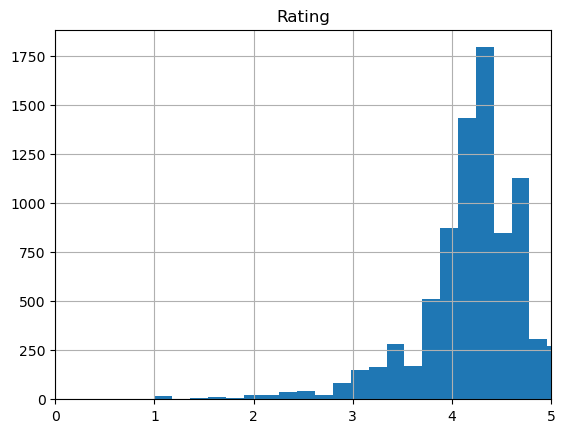

In [51]:
google.hist(column = 'Rating',bins = 100)

plt.xlim(0,5)
plt.show()

In [22]:
#Assigning mean of the rating instead of NULL values
rating_mean = np.where(google["Rating"].isnull(), np.mean(google["Rating"]), google["Rating"])

google["Rating"] = rating_mean

In [23]:
#All of the missing values are overwritten
google["Rating"].isnull().sum()

0

<AxesSubplot:>

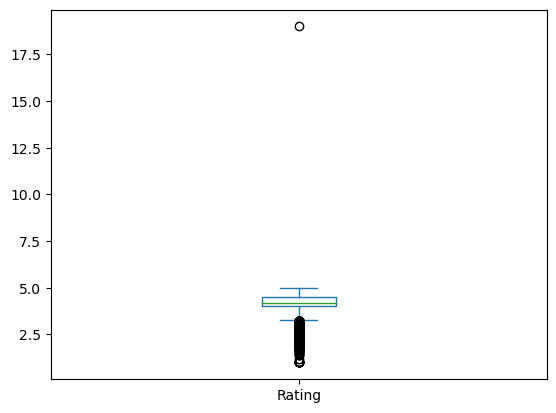

In [25]:
#It can be seen there are some outliers in rating column!
google["Rating"].plot(kind = 'box')

In [26]:
#Outliers(Only ratings which are out of the bounds) in rating column are overwritten succesfully!
rating_mean = np.where((google["Rating"] > 5) | (google["Rating"] < 0) , np.mean(google["Rating"]), google["Rating"])

google["Rating"] = rating_mean

<AxesSubplot:>

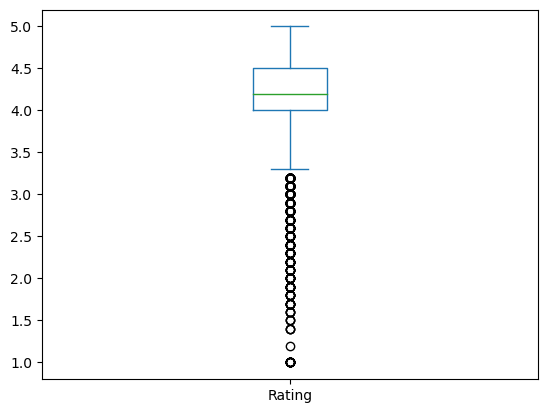

In [27]:
google["Rating"].plot(kind = 'box')

In [28]:
#It can be seen that there is no inconvenient data in reviews column
google.groupby("Reviews")["Reviews"].count()

Reviews
0          593
1          272
10          62
100         10
1000417      1
          ... 
997          1
9971         2
9975         1
999          1
9992         1
Name: Reviews, Length: 5331, dtype: int64

In [29]:
google.groupby("Size")["Size"].count()

Size
1,000+                   1
1.0M                     7
1.1M                    32
1.2M                    41
1.3M                    35
                      ... 
98M                     13
992k                     1
994k                     1
99M                     30
Varies with device    1227
Name: Size, Length: 462, dtype: int64

In [30]:
#1000+ is changed with the value 1000M+
size_inc = np.where(google["Size"] == '1,000+' , "1000M+", google["Size"])
google["Size"] = size_inc

In [31]:
google.groupby("Size")["Size"].count()

Size
1.0M                     7
1.1M                    32
1.2M                    41
1.3M                    35
1.4M                    36
                      ... 
98M                     13
992k                     1
994k                     1
99M                     30
Varies with device    1227
Name: Size, Length: 462, dtype: int64

In [32]:
google.groupby("Installs")["Installs"].count()

Installs
0                    1
0+                  14
1+                  67
1,000+             888
1,000,000+        1417
1,000,000,000+      20
10+                385
10,000+           1031
10,000,000+        937
100+               710
100,000+          1112
100,000,000+       188
5+                  82
5,000+             468
5,000,000+         607
50+                204
50,000+            469
50,000,000+        202
500+               328
500,000+           505
500,000,000+        24
Free                 1
Name: Installs, dtype: int64

In [33]:
installs_inc = np.where(google["Installs"] == "Free" , "0" , google["Installs"])
google["Installs"] = installs_inc

In [34]:
google.groupby("Installs")["Installs"].count()

Installs
0                    2
0+                  14
1+                  67
1,000+             888
1,000,000+        1417
1,000,000,000+      20
10+                385
10,000+           1031
10,000,000+        937
100+               710
100,000+          1112
100,000,000+       188
5+                  82
5,000+             468
5,000,000+         607
50+                204
50,000+            469
50,000,000+        202
500+               328
500,000+           505
500,000,000+        24
Name: Installs, dtype: int64

In [35]:
#Obtaining null values in type column
google["Type"].isnull().sum()

1

In [36]:
type_null = np.where(google["Type"].isnull() , "Not Defined", google["Type"])
google["Type"] = type_null

In [37]:
#Null values are overwritten
google["Type"].isnull().sum()

0

In [38]:
#It can be assumed that 0 corresponds to the value of Free
google.groupby("Type")["Type"].count()

Type
0                 1
Free           8902
Not Defined       1
Paid            756
Name: Type, dtype: int64

In [39]:
type_missing = np.where(google["Type"] == '0' , "Free", google["Type"])
google["Type"] = type_missing

In [40]:
#0 values are overwritten
google.groupby("Type")["Type"].count()

Type
Free           8903
Not Defined       1
Paid            756
Name: Type, dtype: int64

In [41]:
google.groupby("Price")["Price"].count()

Price
$0.99        145
$1.00          3
$1.04          1
$1.20          1
$1.26          1
            ... 
$89.99         1
$9.00          1
$9.99         19
0           8903
Everyone       1
Name: Price, Length: 93, dtype: int64

In [42]:
price_inc = np.where(google["Price"] == 'Everyone' , "0", google["Price"])
google["Price"] = price_inc

In [43]:
google.groupby("Price")["Price"].count()

Price
$0.99      145
$1.00        3
$1.04        1
$1.20        1
$1.26        1
          ... 
$8.99        5
$89.99       1
$9.00        1
$9.99       19
0         8904
Name: Price, Length: 92, dtype: int64

In [44]:
#There is nothing that can be done with unrated values
#in Content Rating column.
google.groupby("Content Rating")["Content Rating"].count()

Content Rating
Adults only 18+       3
Everyone           7903
Everyone 10+        322
Mature 17+          393
Teen               1036
Unrated               2
Name: Content Rating, dtype: int64

In [45]:
google["Content Rating"].isnull().sum()

1

In [46]:
content_missing = np.where(google["Content Rating"].isnull() , "Not Defined", google["Content Rating"])
google["Content Rating"] = content_missing

In [47]:
google.groupby("Genres")["Genres"].count()

Genres
Action                                   299
Action;Action & Adventure                 12
Adventure                                 73
Adventure;Action & Adventure               5
Adventure;Brain Games                      1
                                        ... 
Video Players & Editors                  162
Video Players & Editors;Creativity         1
Video Players & Editors;Music & Video      2
Weather                                   79
Word                                      23
Name: Genres, Length: 119, dtype: int64

In [48]:
google["Genres"].isnull().sum()

0

In [49]:
google.groupby("Last Updated")["Last Updated"].count()

Last Updated
1.0.19               1
April 1, 2016        3
April 1, 2017        4
April 1, 2018        5
April 10, 2013       1
                    ..
September 8, 2016    2
September 8, 2017    5
September 9, 2015    1
September 9, 2016    2
September 9, 2017    1
Name: Last Updated, Length: 1378, dtype: int64

In [50]:
upd_inc = np.where(google["Last Updated"] == '1.0.19' , "Not Defined", google["Last Updated"])
google["Last Updated"] = upd_inc

In [51]:
google.groupby("Last Updated")["Last Updated"].count()

Last Updated
April 1, 2016        3
April 1, 2017        4
April 1, 2018        5
April 10, 2013       1
April 10, 2014       1
                    ..
September 8, 2016    2
September 8, 2017    5
September 9, 2015    1
September 9, 2016    2
September 9, 2017    1
Name: Last Updated, Length: 1378, dtype: int64

In [52]:
google.groupby("Current Ver")["Current Ver"].count()

Current Ver
0.0.0.2                     1
0.0.1                      15
0.0.10                      1
0.0.2                       4
0.0.3                       2
                           ..
v7.0.7.1.0625.1_06_0629     1
v7.0.9.1.0526.1_06_0704     1
v8.0.1.8.0629.1             1
v8[1.0.10]                  1
version 0.994               1
Name: Current Ver, Length: 2818, dtype: int64

In [53]:
google["Current Ver"].isnull().sum()

8

In [54]:
ver_missing = np.where(google["Current Ver"].isnull() , "Not Defined", google["Current Ver"])
google["Current Ver"] = ver_missing

In [55]:
#Null values are overwritten
google["Current Ver"].isnull().sum()

0

In [56]:
google.groupby("Android Ver")["Android Ver"].count()

Android Ver
1.0 and up               2
1.5 and up              20
1.6 and up             116
2.0 and up              32
2.0.1 and up             7
2.1 and up             133
2.2 - 7.1.1              1
2.2 and up             239
2.3 and up             616
2.3.3 and up           273
3.0 and up             231
3.1 and up              10
3.2 and up              36
4.0 and up            1285
4.0.3 - 7.1.1            2
4.0.3 and up          1395
4.1 - 7.1.1              1
4.1 and up            2202
4.2 and up             372
4.3 and up             221
4.4 and up             818
4.4W and up             11
5.0 - 6.0                1
5.0 - 7.1.1              1
5.0 - 8.0                2
5.0 and up             512
5.1 and up              22
6.0 and up              54
7.0 - 7.1.1              1
7.0 and up              42
7.1 and up               3
8.0 and up               6
Varies with device     990
Name: Android Ver, dtype: int64

In [57]:
google["Android Ver"].isnull().sum()

3

In [58]:
and_missing = np.where(google["Android Ver"].isnull() , "Not Defined", google["Android Ver"])
google["Android Ver"] = and_missing

In [59]:
#Null values are overwritten
google["Android Ver"].isnull().sum()

0

In [60]:
#All null values are overwritten
google.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [61]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9660 non-null   object 
 12  Android Ver     9660 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


### Google Reviews DataFrame

In [62]:
google_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [63]:
google_reviews.groupby("App")["App"].count()

App
10 Best Foods for You                             200
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                   40
11st                                               40
1800 Contacts - Lens Store                         80
1LINE – One Line with One Touch                    40
                                                 ... 
Hotspot Shield Free VPN Proxy & Wi-Fi Security     40
Hotstar                                            40
Hotwire Hotel & Car Rental App                     40
Housing-Real Estate & Property                     40
Houzz Interior Design Ideas                        59
Name: App, Length: 1074, dtype: int64

In [64]:
google_reviews.groupby("Translated_Review")["Translated_Review"].count()

Translated_Review
!!!Dont waste time! Failed Samsung flagship phone galaxy s8, Installed ,shows rotating circle internet download, keeps rotates forever proper progress indication; finally shows failed download. Stupid game developers. Go NFS working good.    1
"...Future Follow updated follow"...                                                                                                                                                                                                              1
"An error occurred while loading the search results. Please try again." And so it's already 2 days. The reinstallation did not help                                                                                                               1
"Cisco Spark stopped working" error group work. We 4 groups last days stopped working. Only seems issue Android devices Apple.                                                                                                                    1
"Class

In [65]:
google_reviews.groupby("Sentiment")["Sentiment"].count()

Sentiment
Negative     8271
Neutral      5163
Positive    23998
Name: Sentiment, dtype: int64

In [66]:
google_reviews.groupby("Sentiment_Polarity")["Sentiment_Polarity"].count()

Sentiment_Polarity
-1.000000    234
-0.988281      2
-0.976562      1
-0.955000      1
-0.937500      5
            ... 
 0.975000      1
 0.976562     24
 0.988281      2
 0.992188      2
 1.000000    959
Name: Sentiment_Polarity, Length: 5410, dtype: int64

In [67]:
google_reviews.groupby("Sentiment_Subjectivity")["Sentiment_Subjectivity"].count()

Sentiment_Subjectivity
0.000000    4416
0.022222       1
0.025000       5
0.033333       6
0.041667       2
            ... 
0.966667       9
0.975000       9
0.975926       1
0.987500       1
1.000000    1749
Name: Sentiment_Subjectivity, Length: 4474, dtype: int64

In [68]:
#Dropping duplicates
google_reviews.drop_duplicates(inplace = True)

In [69]:
google_reviews.fillna("Not Defined", inplace = True)

In [70]:
google_reviews.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [71]:
#END OF DATA CLEANING!

In [72]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [98]:
google_sorted = google.sort_values("Installs", ascending = False).head(3)

In [99]:
google_sorted

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device


In [100]:
install = np.where(google_sorted["Installs"] == '500,000,000+', 500000000 , google_sorted["Installs"])
google_sorted["Installs"] = install

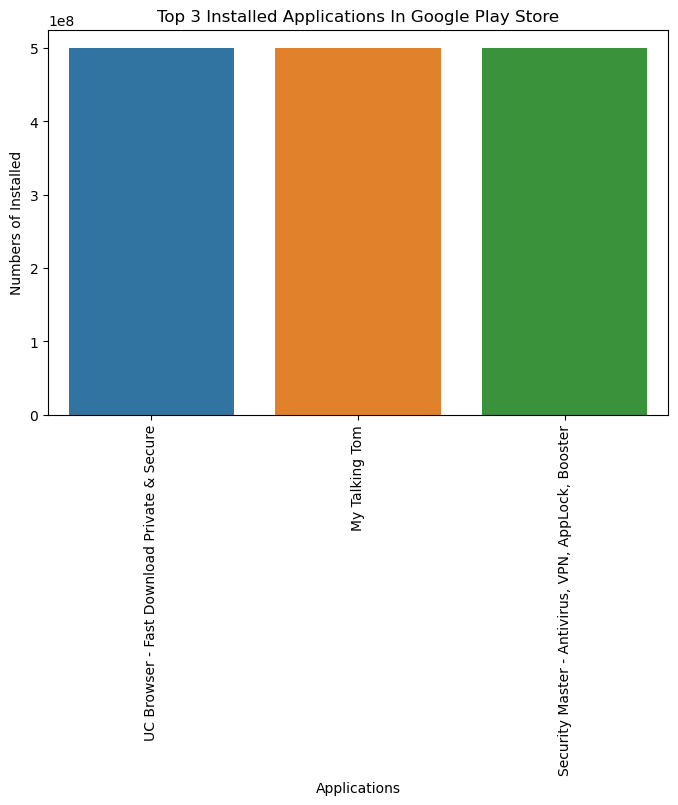

In [101]:
f , ax = plt.subplots(figsize = (8,5))

sns.barplot(x = "App", y = "Installs", data = google_sorted)

plt.xticks(rotation = 90)
plt.xlabel("Applications")
plt.ylabel("Numbers of Installed")
plt.title("Top 3 Installed Applications In Google Play Store")
plt.show()